**STEP 0: PROBLEM STATEMENT**

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
- Airplanes
- Cars
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks

The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.

The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

Images have low resolution (32x32).

Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

**STEP #1: IMPORT LIBRARIES/DATASETS**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [82]:
X_train.shape

(50000, 32, 32, 3)

In [83]:
X_test.shape

(10000, 32, 32, 3)

**STEP #2: VISUALIZE DATA**

[5]


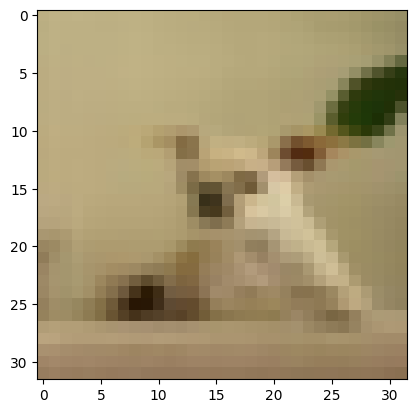

In [84]:
i = 928
plt.imshow(X_train[i])
print(y_train[i])

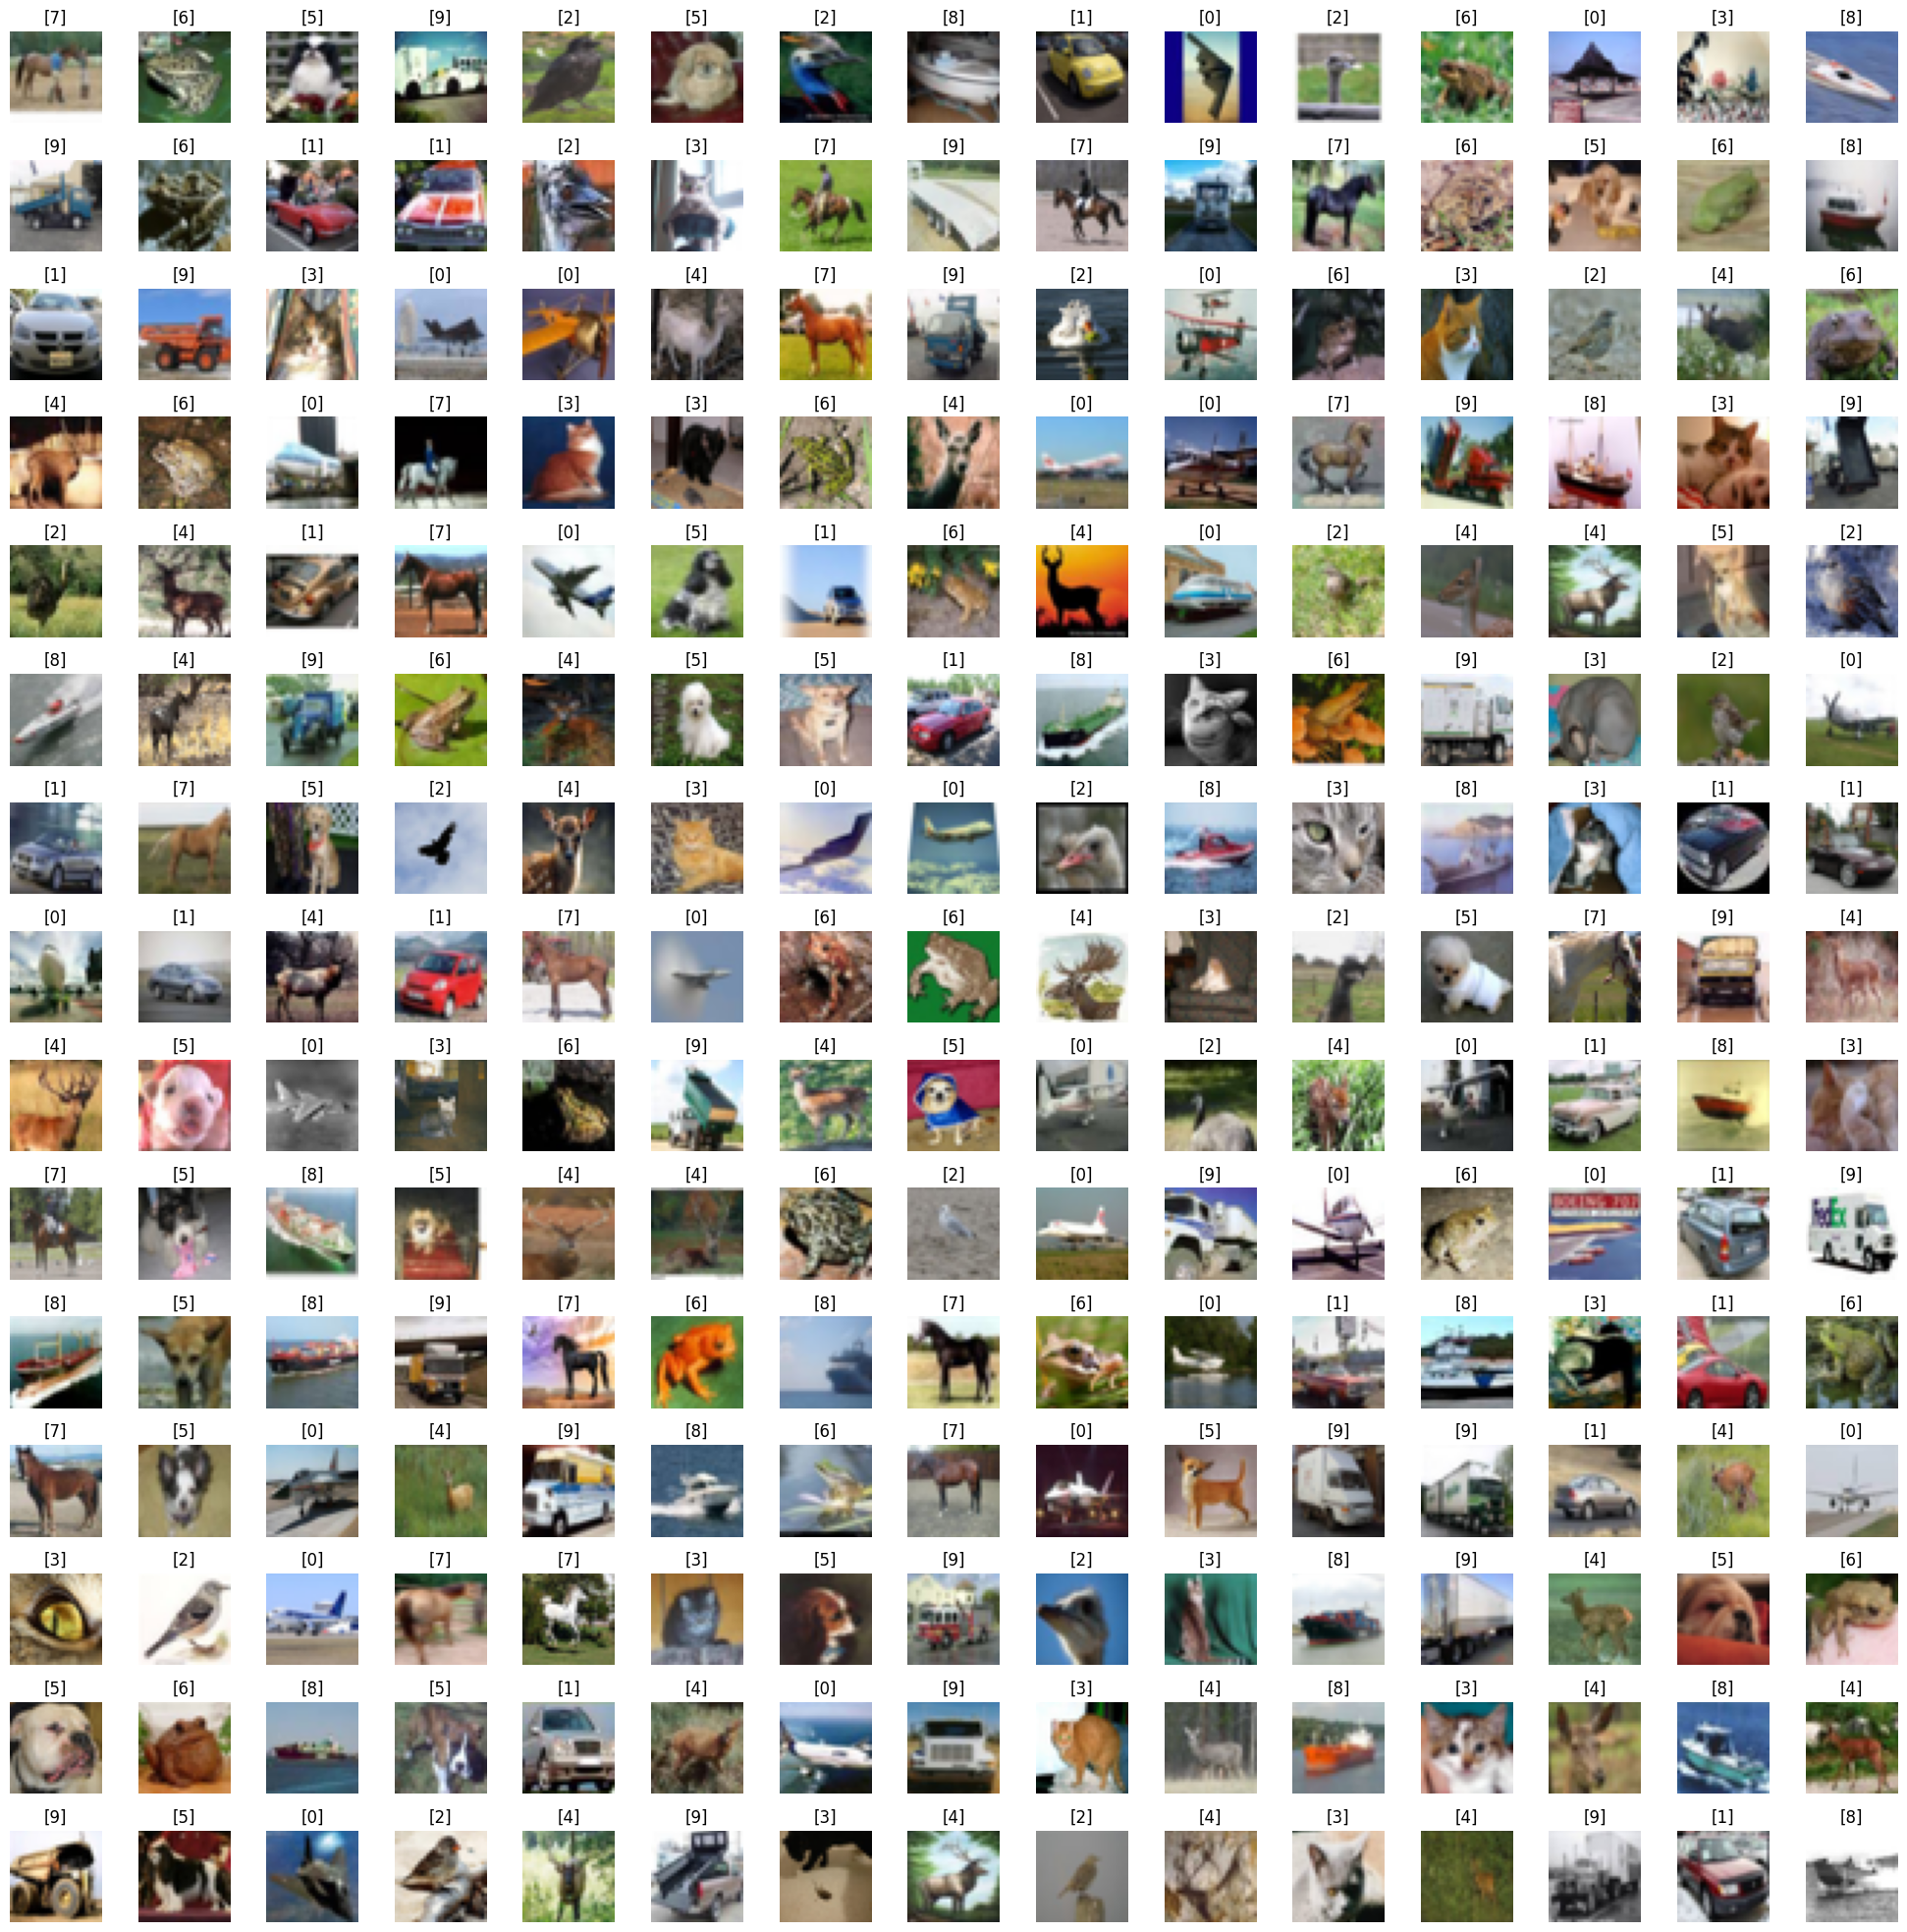

In [85]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [86]:
n_training

50000

**STEP #3: DATA PREPARATION**

In [87]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [88]:
num_cat = 10

In [89]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [90]:
import keras
y_train = keras.utils.to_categorical(y_train, num_cat)

In [91]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [92]:
y_test = keras.utils.to_categorical(y_test, num_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [93]:
X_train = X_train/255
X_test = X_test/255

In [94]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [95]:
X_train.shape

(50000, 32, 32, 3)

In [96]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

**STEP #4: TRAIN THE MODEL**

In [97]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [98]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [100]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 600s 383ms/step - accuracy: 0.3033 - loss: 1.8846
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 617s 380ms/step - accuracy: 0.5773 - loss: 1.2055


**STEP #5: EVALUATE THE MODEL**

In [101]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.6939 - loss: 0.9193
Test Accuracy: 0.6845999956130981


In [102]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step


In [103]:
y_test = y_test.argmax(1)

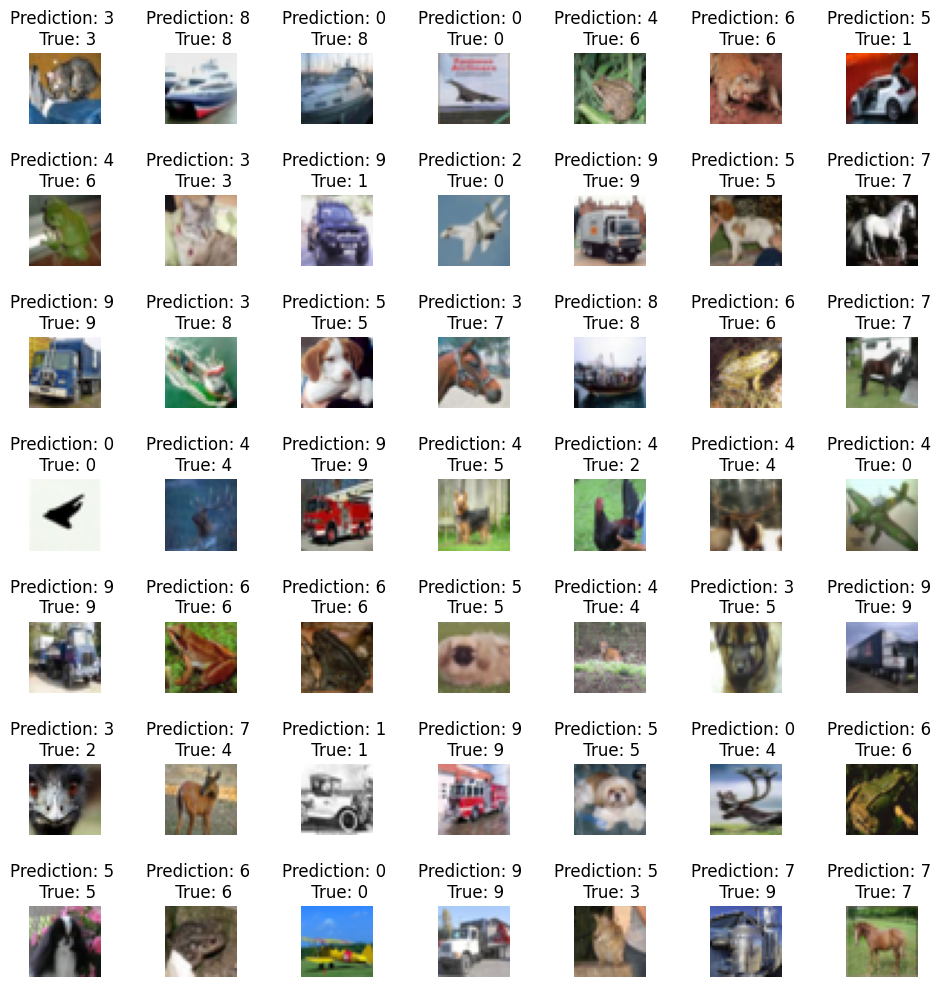

In [104]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction: {} \n True: {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(hspace = 1)

<Axes: >

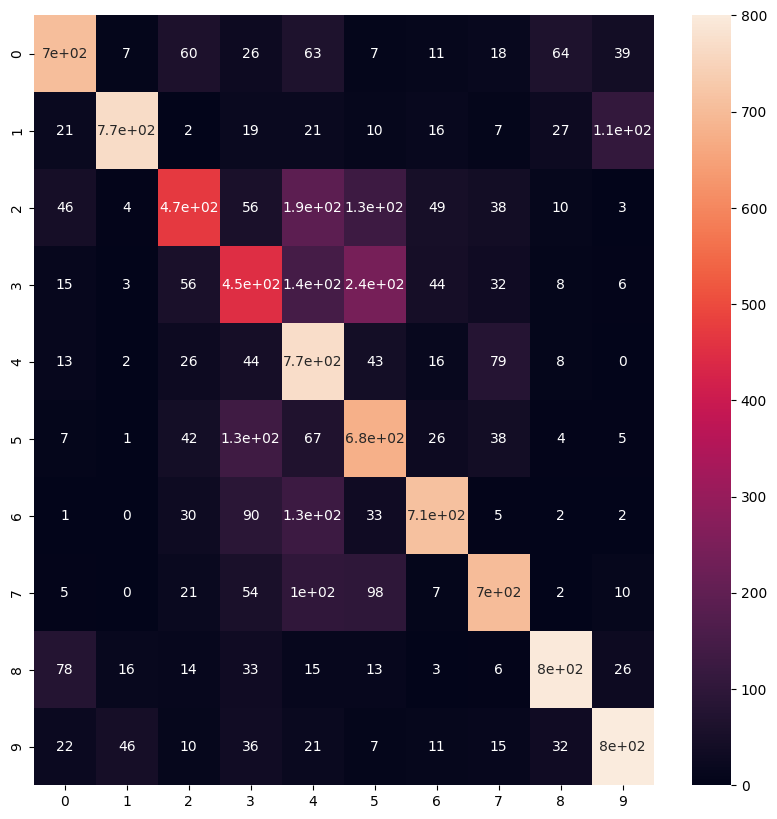

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

**STEP #6: SAVING THE MODEL**

In [106]:
from google.colab import drive
drive.mount('/content/drive')

import os
directory = '/content/drive/My Drive/saved_models'

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

!ls '/content/drive/My Drive/saved_models'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
keras_cifar10_trained_model.h5


**STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION**

* Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.
* Augmentations also include shifting and changing the brightness of the images.  




**STEP 7.1 MODEL TRAINING USING AUGEMENTED DATASET**

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [108]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  13/1563 ━━━━━━━━━━━━━━━━━━━━ 14:25 558ms/step - accuracy: 0.3484 - loss: 1.9757

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_augmentation.h5')
cnn_model.save(model_path)